In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
housing = pd.read_csv("D:/Dixant/CDAC/Machine Learning/December/14-12-21/housing.csv")

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
 
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
 
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [6]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
status = pd.get_dummies(housing['furnishingstatus'])

In [8]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [9]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)

In [10]:
housing=pd.concat([housing,status], axis=1)

In [11]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# SIMPLE LINEAR REGRESSION


In [13]:
X = housing.iloc[:, 1:-1].values
y = housing.iloc[:, 0].values

In [14]:
X.shape

(545, 12)

In [15]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80)

In [16]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [17]:
print(slr.intercept_)
print(slr.coef_)

-382296.64941558056
[2.45565317e+02 1.16037541e+05 1.04154115e+06 4.68786074e+05
 4.82551188e+05 2.32072291e+05 3.61551332e+05 1.01882121e+06
 8.44286109e+05 3.42588135e+05 6.04282865e+05 1.98986956e+05]


In [19]:
# Predicting the Test set results
y_pred = slr.predict(X_test)

In [20]:
y_pred

array([2879564.32894787, 7517962.66990021, 3488401.68348361,
       5379466.9198539 , 6119720.18175912, 4724249.61925254,
       8755948.56167377, 2808710.80642695, 4622375.81736033,
       2925678.9467415 , 3763926.10499811, 6046359.4787602 ,
       6246294.9130618 , 3922651.53177167, 4941158.68592679,
       2737821.47925122, 4952877.84121941, 5314382.64922954,
       4528468.07906815, 3824582.48673898, 6982551.22788718,
       3733509.79017651, 6273843.19428837, 2736514.60323461,
       6955257.91961504, 6392398.24462243, 3536232.38831149,
       2921940.93500342, 4374547.75336534, 4189137.02005588,
       6114080.10705861, 3001560.51399727, 2879573.5059594 ,
       5367369.60370513, 7740819.60799919, 7590570.98395944,
       4799341.19337501, 3266720.04710696, 4087115.7311875 ,
       7066859.91375763, 6263408.15868627, 5730896.52999728,
       2573819.65216288, 3798927.09123984, 4777331.970361  ,
       4922053.7305201 , 6233927.5453756 , 5211676.02576827,
       7094137.79335379,

In [21]:
y_test

array([ 3360000,  5943000,  4473000,  4480000,  8120000,  4130000,
        7245000,  2660000,  4200000,  3780000,  2275000,  6720000,
        4830000,  4900000,  2590000,  3010000,  4473000,  6160000,
        5950000,  4900000,  6650000,  2450000,  5460000,  3395000,
        4970000,  3500000,  3500000,  2450000,  2835000,  3500000,
        6300000,  2660000,  3220000,  3640000,  8043000,  9100000,
        5110000,  3360000,  3850000,  7525000,  4025000,  5600000,
        3150000,  3234000,  5040000,  3990000,  6195000,  5460000,
        4690000,  4165000,  3115000,  7140000,  3150000,  2660000,
        4767000,  4200000,  4690000,  6895000,  5383000,  5866000,
        6440000,  9800000, 12250000,  3430000,  7070000,  6860000,
        5495000, 10150000,  5040000,  6650000,  7490000,  2940000,
        6629000,  3920000,  1750000,  4382000,  4270000,  3780000,
        4340000,  4690000,  3080000,  3500000,  1890000,  3773000,
        3150000,  3500000,  8575000,  5740000,  4200000,  6510

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6475373522811132

In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 1312662008302.8042


# MULTIVARIANT LINEAR REGRESSION

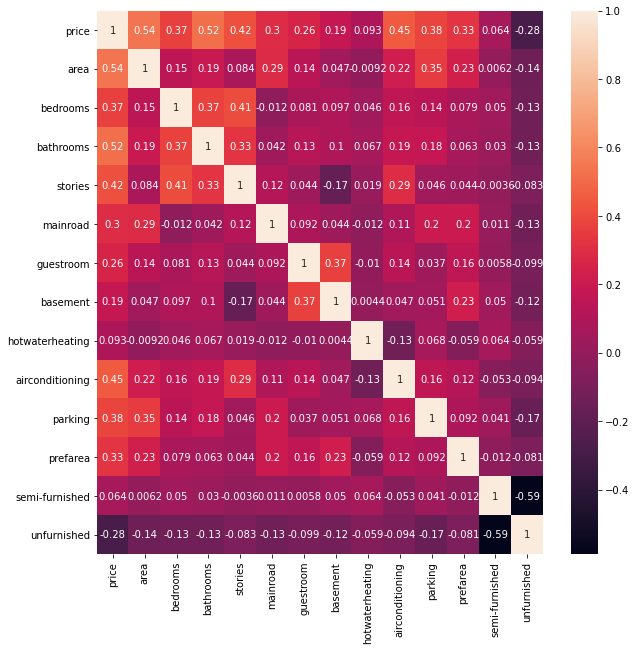

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(housing.corr(),annot=True)
plt.show()

In [31]:
import statsmodels.api as sm

In [32]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

[[1.000e+00 4.800e+03 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 4.040e+03 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.816e+03 2.000e+00 ... 2.000e+00 0.000e+00 0.000e+00]
 ...
 [1.000e+00 3.300e+03 3.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 4.500e+03 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 3.640e+03 2.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]]


In [33]:
lr.params

array([-3.82296649e+05,  2.45565317e+02,  1.16037541e+05,  1.04154115e+06,
        4.68786074e+05,  4.82551188e+05,  2.32072291e+05,  3.61551332e+05,
        1.01882121e+06,  8.44286109e+05,  3.42588135e+05,  6.04282865e+05,
        1.98986956e+05])

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     75.00
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.01e-96
Time:                        00:25:30   Log-Likelihood:                -6662.2
No. Observations:                 436   AIC:                         1.335e+04
Df Residuals:                     423   BIC:                         1.340e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.823e+05   2.64e+05     -1.446      0.1